In [34]:
import pandas as pd
import numpy as np

In [382]:
int_df = pd.read_csv('InteractionData.csv')

###3 Week Segments for 20%, 40%, 60%, 80% and 100% of the semester complete
int_df['CourseCompletionPerc'] = ((int_df.WeekNumber - 1) // 3 + 1) * 20

final_int_3 = int_df.loc[int_df.WeekNumber == 3].copy()
final_int_3['Key'] = final_int_3.EmployeeId.astype(str) + final_int_3.Course + final_int_3.TermSourceKey.astype(str)
final_int_6 = int_df.loc[int_df.WeekNumber == 6].copy()
final_int_6['Key'] = final_int_6.EmployeeId.astype(str) + final_int_6.Course + final_int_6.TermSourceKey.astype(str)
final_int_9 = int_df.loc[int_df.WeekNumber == 9].copy()
final_int_9['Key'] = final_int_9.EmployeeId.astype(str) + final_int_9.Course + final_int_9.TermSourceKey.astype(str)

print(len(final_int_3))
final_int_df = final_int_3[(final_int_3.Key.isin(final_int_6.Key)) & (final_int_3.Key.isin(final_int_9.Key))]
final_int_df = final_int_df.drop('Key', axis=1)

first_seg_int = int_df.loc[(int_df.CourseCompletionPerc == 20)].copy()
first_seg_int['Key'] = first_seg_int.EmployeeId.astype(str) + first_seg_int.Course + first_seg_int.TermSourceKey.astype(str)
second_seg_int = int_df.loc[(int_df.CourseCompletionPerc == 40)].copy()
second_seg_int['Key'] = second_seg_int.EmployeeId.astype(str) + second_seg_int.Course + second_seg_int.TermSourceKey.astype(str)
third_seg_int = int_df.loc[(int_df.CourseCompletionPerc == 60)].copy()
third_seg_int['Key'] = third_seg_int.EmployeeId.astype(str) + third_seg_int.Course + third_seg_int.TermSourceKey.astype(str)

first_seg_int = first_seg_int[first_seg_int.Key.isin(second_seg_int.Key)]
first_seg_int = first_seg_int[first_seg_int.Key.isin(third_seg_int.Key)]
#second_seg_int = second_seg_int[second_seg_int.Key.isin(first_seg_int.Key)]
#second_seg_int = second_seg_int[second_seg_int.Key.isin(third_seg_int.Key)]
#third_seg_int = third_seg_int[third_seg_int.Key.isin(first_seg_int.Key)]
#third_seg_int = third_seg_int[third_seg_int.Key.isin(second_seg_int.Key)]
#first_seg_int = pd.concat([first_seg_int, second_seg_int, third_seg_int])

first_seg_int = first_seg_int.drop('Key', axis=1)

final_int_df['RecentInteractionsRank'] = final_int_df.groupby(['Course', 'TermSourceKey', 'CourseCompletionPerc'])['TotalInteractions'].rank(method='max', ascending=False)
final_int_df['RecentDurationRank'] = final_int_df.groupby(['Course', 'TermSourceKey', 'CourseCompletionPerc'])['TotalMinutes'].rank(method='max', ascending=False)

print('Week 3 Interaction Records:', len(final_int_df))
print('Seg Interaction Records:', len(first_seg_int))

print('Total Number of Students:', len(final_int_df.groupby(['EmployeeId'])))
print('Total Number of Classes:', len(final_int_df.groupby(['Course', 'TermSourceKey'])))

final_int_df = final_int_df.rename(columns={'TotalInteractions':'RecentInteractions', 'TotalMinutes':'RecentDuration'})


254241
Week 3 Interaction Records: 214184
Seg Interaction Records: 709227
Total Number of Students: 24545
Total Number of Classes: 5674


In [35]:
int_df = pd.read_csv('InteractionData.csv')

###3 Week Segments for 20%, 40%, 60%, 80% and 100% of the semester complete
int_df['CourseCompletionPerc'] = ((int_df.WeekNumber - 1) // 3 + 1) * 20

final_int_df = int_df.loc[int_df.WeekNumber == 3].copy()
first_seg_int = int_df.loc[int_df.CourseCompletionPerc == 20].copy()

final_int_df['RecentInteractionsRank'] = final_int_df.groupby(['Course', 'TermSourceKey', 'CourseCompletionPerc'])['TotalInteractions'].rank(method='max', ascending=False)
final_int_df['RecentDurationRank'] = final_int_df.groupby(['Course', 'TermSourceKey', 'CourseCompletionPerc'])['TotalMinutes'].rank(method='max', ascending=False)

print('Total Number of Week3 Interaction Records:', len(final_int_df))
print('First Seg Interaction Records:', len(first_seg_int))

print('Total Number of Students:', len(final_int_df.groupby(['EmployeeId'])))
print('Total Number of Classes:', len(final_int_df.groupby(['Course', 'TermSourceKey'])))

final_int_df = final_int_df.rename(columns={'TotalInteractions':'RecentInteractions', 'TotalMinutes':'RecentDuration'})


Total Number of Week3 Interaction Records: 254241
First Seg Interaction Records: 761055
Total Number of Students: 25547
Total Number of Classes: 5900


In [36]:
#TotalInteractions and TotalInteractionsRank
total_int = first_seg_int.groupby(['Course', 'TermSourceKey', 'EmployeeId'])['TotalInteractions'].sum().reset_index()
total_int['TotalInteractionsRank'] = total_int.groupby(['Course', 'TermSourceKey'])['TotalInteractions'].rank(method='max', ascending=False)
final_int_df = pd.merge(final_int_df, total_int, on=['Course', 'TermSourceKey', 'EmployeeId'])

#TotalInteractionsNorm
total_norm = total_int.groupby(['Course', 'TermSourceKey'])['TotalInteractions'].mean().reset_index()
total_norm = total_norm.rename(columns={'TotalInteractions':'TotalInteractionsNorm'})
final_int_df = pd.merge(final_int_df, total_norm, on=['Course', 'TermSourceKey'])



In [37]:
#TotalDuration and TotalDurationRank
total_dur = first_seg_int.groupby(['Course', 'TermSourceKey', 'EmployeeId'])['TotalMinutes'].sum().reset_index()
total_dur['TotalDurationRank'] = total_dur.groupby(['Course', 'TermSourceKey'])['TotalMinutes'].rank(method='max', ascending=False)
total_dur = total_dur.rename(columns={'TotalMinutes':'TotalDuration'})
final_int_df = pd.merge(final_int_df, total_dur, on=['Course', 'TermSourceKey', 'EmployeeId'])

#TotalDurationNorm
total_norm = total_dur.groupby(['Course', 'TermSourceKey'])['TotalDuration'].mean().reset_index()
total_norm = total_norm.rename(columns={'TotalDuration':'TotalDurationNorm'})
final_int_df = pd.merge(final_int_df, total_norm, on=['Course', 'TermSourceKey'])



In [38]:
#RecentInteractionsNorm
recent_int_norm = final_int_df.groupby(['Course', 'TermSourceKey'])['RecentInteractions'].mean().reset_index()
recent_int_norm = recent_int_norm.rename(columns={'RecentInteractions':'RecentInteractionsNorm'})
final_int_df = pd.merge(final_int_df, recent_int_norm, on=['Course', 'TermSourceKey'])

#RecentDurationNorm
recent_dur_norm = final_int_df.groupby(['Course', 'TermSourceKey'])['RecentDuration'].mean().reset_index()
recent_dur_norm = recent_dur_norm.rename(columns={'RecentDuration':'RecentDurationNorm'})
final_int_df = pd.merge(final_int_df, recent_dur_norm, on=['Course', 'TermSourceKey'])

print(final_int_df.columns)
print("Total Students:", len(final_int_df))

Index(['EmployeeId', 'Course', 'TermSourceKey', 'WeekNumber',
       'RecentInteractions', 'RecentDuration', 'CourseCompletionPerc',
       'RecentInteractionsRank', 'RecentDurationRank', 'TotalInteractions',
       'TotalInteractionsRank', 'TotalInteractionsNorm', 'TotalDuration',
       'TotalDurationRank', 'TotalDurationNorm', 'RecentInteractionsNorm',
       'RecentDurationNorm'],
      dtype='object')
Total Students: 254241


In [39]:
top_dfw = pd.read_excel("DFW_100_Sp19.xlsx")
top_dfw_classes = top_dfw.Course.tolist()

In [40]:
grade_df = pd.read_csv('GradeData3.csv')

class_num = grade_df.Course.str.split(expand = True)
grade_df = grade_df[(class_num[1].str.slice(start=0, stop=1) == '1') | 
                    (class_num[1].str.slice(start=0, stop=1) == '2')]
#                    (class_num[1].str.slice(start=0, stop=1) == '3')]
#grade_df = grade_df[(class_num[1].str.slice(start=0, stop=1) == '1')]

grade_df = grade_df[grade_df.Course.isin(top_dfw_classes)]

#Grade Rank
grade_df['GradePercentageRank'] = grade_df.groupby(['Course', 'TermSourceKey'])['GradePercentage'].rank(method='max', ascending=False)

#Grade Norm
grade_norm = grade_df.groupby(['Course', 'TermSourceKey'])['GradePercentage'].mean().reset_index()
grade_norm = grade_norm.rename(columns={'GradePercentage':'GradePercentageNorm'})
grade_df = pd.merge(grade_df, grade_norm, on=['Course', 'TermSourceKey'])

grade_df.loc[grade_df.EmployeeID == 'Unknown', 'EmployeeID'] = float('NaN')
grade_df = grade_df.dropna()


print('Total Number of Classes:', len(grade_df.groupby(['Course'])))
grade_df.head(20)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total Number of Classes: 42


,EmployeeID,Course,TermSourceKey,GradePercentage,TotalAssignments,GradePercentageRank,GradePercentageNorm
0,1000000734,MATH 151,2172,0.000000,15,365.0,65.680899
1,2500036029,MATH 151,2172,92.917650,17,28.0,65.680899
2,2500105997,MATH 151,2172,0.000000,1,365.0,65.680899
3,2500091927,MATH 151,2172,73.000000,2,178.0,65.680899
4,3000081376,MATH 151,2172,99.335260,17,1.0,65.680899
5,3000171817,MATH 151,2172,69.546950,17,207.0,65.680899
6,3000185817,MATH 151,2172,78.699860,17,137.0,65.680899
7,3000173507,MATH 151,2172,92.176330,17,31.0,65.680899
8,3000191682,MATH 151,2172,5.000000,16,347.0,65.680899
9,3000079901,MATH 151,2172,73.682350,17,170.0,65.680899


In [41]:
sis_df = pd.read_csv('SISData.csv')
course_size_df = pd.read_csv('CourseSize.csv')

final_int_df = final_int_df.rename(columns={'EmployeeId':'EmployeeID'})
final_int_df['EmployeeID'] = pd.to_numeric(final_int_df.EmployeeID, errors='coerce')
final_int_df = final_int_df[np.isfinite(final_int_df['EmployeeID'])]

df = pd.merge(sis_df, course_size_df, on=['TermSourceKey', 'Course'])
df = pd.merge(df, final_int_df, on=['TermSourceKey', 'Course', 'EmployeeID'])
df = pd.merge(df, grade_df, on=['TermSourceKey', 'Course', 'EmployeeID'])

print(len(df))
print(df.columns)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


18326
Index(['EmployeeID', 'TermSourceKey', 'TermKey', 'StudentKey', 'HighSchoolGPA',
       'SATMathScore', 'SATReadingWritingScore', 'SATMathOldScore',
       'SATWritingOldScore', 'SATReadingOldScore', 'ACTCompositeScore',
       'SourceAge', 'GenderDescription', 'EthnicityDescription',
       'MajorDescription', 'MilitaryStatusKey', 'FirstGenerationKey',
       'CumulativeTransferCredits', 'TransferGPA', 'CumulativeGPA',
       'CumulativeCreditsAttempted', 'CumulativeCreditsEarned',
       'AcademicLevelDescription', 'AcademicLoadTuitionDescription',
       'PellEligibilityIndicatorKey', 'Course', 'CourseLevel', 'Section',
       'Grade', 'PrevTermCreditsAttempted', 'PrevTermCreditsEarned',
       'PrevTermGPA', 'PrevMaxGrade', 'PrevMinGrade', 'CourseSize',
       'WeekNumber', 'RecentInteractions', 'RecentDuration',
       'CourseCompletionPerc', 'RecentInteractionsRank', 'RecentDurationRank',
       'TotalInteractions', 'TotalInteractionsRank', 'TotalInteractionsNorm',
       'T

In [42]:
df = pd.concat([df.drop('GenderDescription', axis=1), pd.get_dummies(df['GenderDescription'], prefix='Gender')], axis=1)
df = pd.concat([df.drop('EthnicityDescription', axis=1), pd.get_dummies(df['EthnicityDescription'], prefix='Ethnicity')], axis=1)
df = pd.concat([df.drop('FirstGenerationKey', axis=1), pd.get_dummies(df['FirstGenerationKey'], prefix='First_Gen')], axis=1)
df = pd.concat([df.drop('PellEligibilityIndicatorKey', axis=1), pd.get_dummies(df['PellEligibilityIndicatorKey'], prefix='Pell_Eligible')], axis=1)
df = pd.concat([df.drop('AcademicLoadTuitionDescription', axis=1), pd.get_dummies(df['AcademicLoadTuitionDescription'], prefix='Load')], axis=1)
df = pd.concat([df.drop('AcademicLevelDescription', axis=1), pd.get_dummies(df['AcademicLevelDescription'], prefix='Academic_Level')], axis=1)

print(df.columns)

Index(['EmployeeID', 'TermSourceKey', 'TermKey', 'StudentKey', 'HighSchoolGPA',
       'SATMathScore', 'SATReadingWritingScore', 'SATMathOldScore',
       'SATWritingOldScore', 'SATReadingOldScore', 'ACTCompositeScore',
       'SourceAge', 'MajorDescription', 'MilitaryStatusKey',
       'CumulativeTransferCredits', 'TransferGPA', 'CumulativeGPA',
       'CumulativeCreditsAttempted', 'CumulativeCreditsEarned', 'Course',
       'CourseLevel', 'Section', 'Grade', 'PrevTermCreditsAttempted',
       'PrevTermCreditsEarned', 'PrevTermGPA', 'PrevMaxGrade', 'PrevMinGrade',
       'CourseSize', 'WeekNumber', 'RecentInteractions', 'RecentDuration',
       'CourseCompletionPerc', 'RecentInteractionsRank', 'RecentDurationRank',
       'TotalInteractions', 'TotalInteractionsRank', 'TotalInteractionsNorm',
       'TotalDuration', 'TotalDurationRank', 'TotalDurationNorm',
       'RecentInteractionsNorm', 'RecentDurationNorm', 'GradePercentage',
       'TotalAssignments', 'GradePercentageRank', 'Grade

In [43]:
df['Has_Major'] = (df.MajorDescription.str.contains('BS')) | (df.MajorDescription.str.contains('BA')) | (df.MajorDescription.str.contains('BFA'))
df['Has_Major'] = df.Has_Major.astype(int)

df.Has_Major.value_counts()

1    12143
0     6183
Name: Has_Major, dtype: int64

In [44]:
df['In_Military'] = (df.MilitaryStatusKey != -1)
df['In_Military'] = df.In_Military.astype(int)

df.In_Military.value_counts()

0    16155
1     2171
Name: In_Military, dtype: int64

In [45]:
df['CareerCreditCompletionPerc'] = df.CumulativeCreditsEarned / df.CumulativeCreditsAttempted
df['CareerFailedCredits'] = df.CumulativeCreditsAttempted - df.CumulativeCreditsEarned
df['PrevTermCreditsCompletionPerc'] = df.PrevTermCreditsEarned / df.PrevTermCreditsAttempted
df['PrevTermFailedCredits'] = df.PrevTermCreditsAttempted - df.PrevTermCreditsEarned

In [46]:
df['Failed_Class'] = (df.Grade == 'D') | (df.Grade == 'F') | (df.Grade == 'W')
df['Failed_Class'] = df.Failed_Class.astype(int)

counts = df.Failed_Class.value_counts()

print("Total Students with all necessary data: ", (counts[0] + counts[1]))
print("Percentage of Students that Passed:", counts[0] / (counts[0] + counts[1]))
print("Percentage of Students that Failed:", counts[1] / (counts[0] + counts[1]))

print(counts)


Total Students with all necessary data:  18326
Percentage of Students that Passed: 0.7059914875040926
Percentage of Students that Failed: 0.2940085124959075
0    12938
1     5388
Name: Failed_Class, dtype: int64


In [47]:
df = df.drop(['EmployeeID', 'TermSourceKey', 'TermKey', 'StudentKey' ,'MajorDescription', 
            'MilitaryStatusKey', 'CumulativeCreditsEarned', 'Course', 'Section',  
            'PrevTermCreditsEarned', 'Grade'], axis=1)

print(df.dtypes)

HighSchoolGPA                                       float64
SATMathScore                                        float64
SATReadingWritingScore                              float64
SATMathOldScore                                     float64
SATWritingOldScore                                  float64
SATReadingOldScore                                  float64
ACTCompositeScore                                   float64
SourceAge                                             int64
CumulativeTransferCredits                           float64
TransferGPA                                         float64
CumulativeGPA                                       float64
CumulativeCreditsAttempted                          float64
CourseLevel                                           int64
PrevTermCreditsAttempted                            float64
PrevTermGPA                                         float64
PrevMaxGrade                                        float64
PrevMinGrade                            

In [48]:
df = df.fillna(0)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

Y = df['Failed_Class'] #13.9% = 0
X = df.drop(['Failed_Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

def evaluate_model(y_test, predictions):
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    recall = recall_score(y_test, predictions)
    print("Recall: %.2f%%" % (recall * 100.0))

    precision = precision_score(y_test, predictions)
    print("Precision: %.2f%%" % (precision * 100.0))

    f1 = f1_score(y_test, predictions)
    print("F1 Score: %.2f" % f1)
    

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate_model(y_test, predictions)

probs = rf.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, probs))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 81.53%
Recall: 52.22%
Precision: 80.88%
F1 Score: 0.63
ROC AUC: 0.8619340988237927


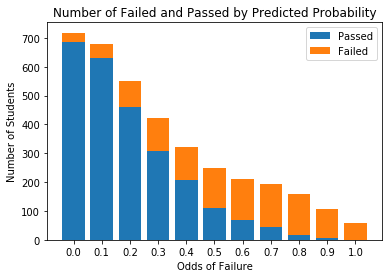

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

y_failed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_passed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in range(len(probs)):
    if y_test.iat[i] == 1:
        index = x.index(probs[i]) 
        y_failed[index] += 1
    else:
        index = x.index(probs[i]) 
        y_passed[index] += 1

x_pos = np.arange(len(x))

p1 = plt.bar(x_pos, y_passed, align='center')
p2 = plt.bar(x_pos, y_failed, align='center', bottom=y_passed)
plt.ylabel('Number of Students', fontsize=10)
plt.xlabel('Odds of Failure', fontsize=10)
plt.title('Number of Failed and Passed by Predicted Probability')
plt.xticks(x_pos, x)
plt.legend((p1[0], p2[0]), ('Passed', 'Failed'))
plt.show()

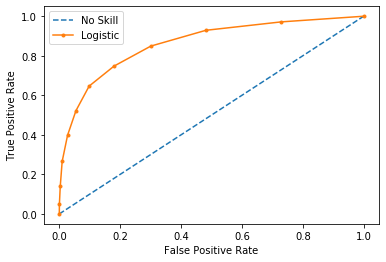

In [52]:
from sklearn.metrics import roc_curve

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rf_probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [53]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
GradePercentage,0.089702
GradePercentageRank,0.064550
CumulativeGPA,0.048511
CareerCreditCompletionPerc,0.036768
PrevTermGPA,0.035117
TotalInteractionsRank,0.029933
HighSchoolGPA,0.029816
TotalInteractions,0.029455
TotalDurationRank,0.029415
CareerFailedCredits,0.028382


In [56]:
y_pred = rf.predict_proba(X_test)

predictions = y_pred[:, 1]
predictions[predictions <= 0.7] = 0
predictions[predictions > 0.7] = 1

evaluate_model(y_test, predictions)

Accuracy: 76.79%
Recall: 26.55%
Precision: 92.57%
F1 Score: 0.41


In [57]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_class = xgb.XGBClassifier(eta=0.1, eval_metric="auc").fit(X_train, y_train)

y_pred = xgb_class.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate_model(y_test, predictions)

Accuracy: 76.57%
Recall: 41.65%
Precision: 69.90%
F1 Score: 0.52


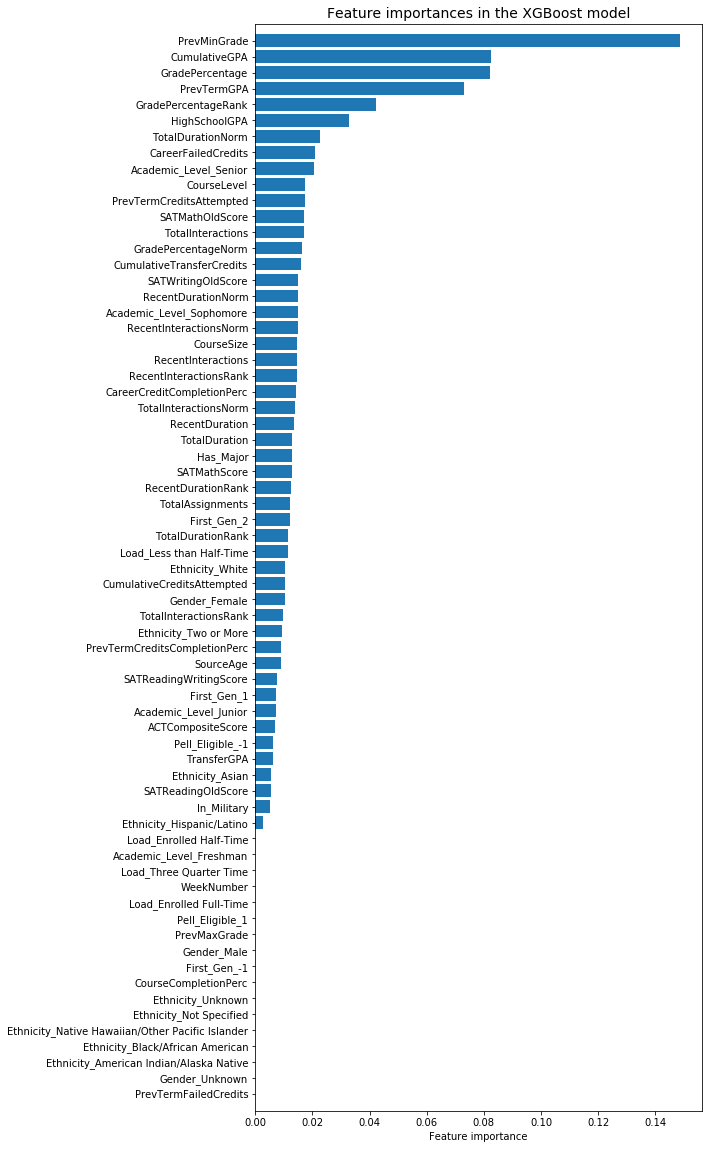

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_class.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()